In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

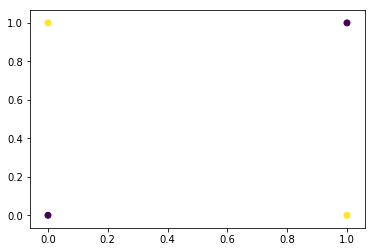

In [2]:
x_data = np.array([[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]])
y_data = np.array([[-1], [1], [1], [-1]])

plt.scatter(x_data[:,0], x_data[:,1], c = y_data[:,0])

In [3]:
# adding the nonlinear items for x_data
poly_reg = PolynomialFeatures(degree = 2)
x_ = poly_reg.fit_transform(x_data)

In [4]:
def update(x_data, y_data, Ws, Lr):
    '''
    Instruction: to update the weights
    
    Parameters: 
        x_data: the input features
        y_data: the real label
        Ws: the weights that will be updated
        Lr: learning rate
    
    Return:
        new_Ws: the weights after updation
    '''
    output = np.dot(x_data,Ws)
    Ws_C = Lr * (x_data.T.dot(y_data - output))/ int(x_data.shape[0])
    new_Ws = Ws + Ws_C
    return new_Ws

In [5]:
# initialize the weights, from -1 to 1, 6 x 1
Ws = (np.random.random([6,1]) - 0.5) * 2
lr = 0.11
for _ in range(1000):
    Ws = update(x_, y_data, Ws, lr)

In [6]:
# define a calculate function to get the parameters for decesion curve
def calculate(x, W, root):
    a = W[5]
    b = W[2] + x * W[4] 
    c = x * x * W[3] + x * W[1]  + W[0]
    
    if root == 1:
        return (-b + np.sqrt(b*b - 4 * a * c)) /(2 * a)
    
    if root == 2:
        return (-b - np.sqrt(b*b - 4 * a * c)) / (2 * a)

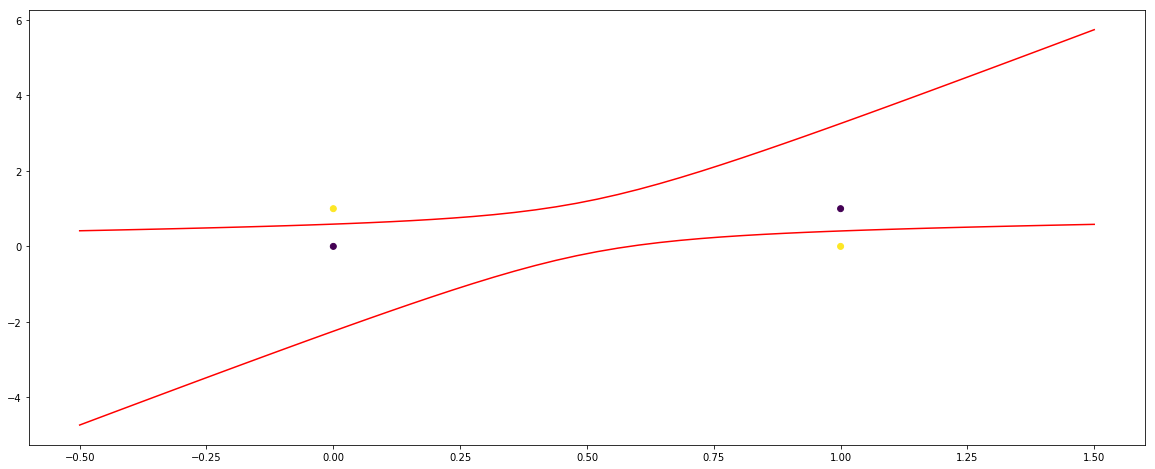

In [7]:
plt.figure(figsize = (20, 8))
xdata = np.linspace(-0.5,1.5)
plt.plot(xdata, calculate(xdata, Ws, 1), 'r')
plt.plot(xdata, calculate(xdata, Ws, 2), 'r')
plt.scatter(x_data[:,0], x_data[:,1], c = y_data[:,0])

In [8]:
print(np.dot(x_, Ws))

[[-0.98871025]
 [ 0.99246097]
 [ 0.99246097]
 [-0.99416646]]
